 # $Experimento$ $de$ $Young.$
 
Se conoce como experimento de Young a la difracción de Fraunhofer por dos rendijas paralelas e iguales.
Para la contribución de la energia $E_{01}$ se tiene que [1]: 
 \begin{equation}
E_{01}=E_{02}=A_0\frac{sin(\alpha/2)}{\alpha/2}
\end{equation}

Obteniendo que la intensidad para este sistema es:

\begin{equation}
I=I_0\left[\frac{sin(\alpha/2)}{\alpha/2}\right]^2cos^2(\beta/2) (1) 
\end{equation} 

Para tener la expresión anterior en terminos de $\theta$ se usa:
\begin{equation}
\alpha=2\pi\left(\frac{b}{\lambda}\right)sin(\theta)   
\end{equation}

\begin{equation}
\beta=2\pi\left(\frac{a}{\lambda}\right)sin(\theta)
\end{equation}

Remplazando en (1) se tiene:

\begin{equation}
I(\theta)=I_0\left[\frac{sin(\pi(b/\lambda)sin(\theta))}{\pi(b/\lambda)sin(\theta)}\right]^2cos^2\left[\pi(a/\lambda)sin(\theta)\right] (2)
\end{equation}

Se usa la ecuación (2) para obtener las intensidades para 4 colores del espectro (4 longitudes de onda). Se analiza con las gráficas. Se generan las franjas en la pantalla por interferencia para cada longitud

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import  optimize
import pandas as pd

Con los datos obtenidos en [2] se crea un DataFrame para 4 colores con su respectiva longitud de onda.

In [2]:
df=pd.DataFrame({"Color (Aprox.)": ['Azul', 'Verde', 'Naranja', 'Rojo'],
                 "Longitud (m)": [400e-9, 500e-9, 600e-9, 700e-9]})
df

,Color (Aprox.),Longitud (m)
0,Azul,4.000000e-07
1,Verde,5.000000e-07
2,Naranja,6.000000e-07
3,Rojo,7.000000e-07


Se tiene en cuenta que $a,b>> \lambda$, esto implica que $sen(\theta)\approx \theta$ entonces $\theta\approx tan(\theta)=y/D$

In [3]:
#Datos de condiciones iniciales. 
lamb=df['Longitud (m)'][0]
a=0.0005 #Separación entre rendijas
D=1 #Dsitancia de la pantalla a la rendija
y=0.007 #Distancia del primer maximo de difracción.
n=1
b= (n+0.5)*D*lamb/y #Se obtien a partir del angulo en el primer maximo de difracción
m=2 #Segundo mínimo de difracción

#theta = np.linspace(-0.002, 0.002, 500)
theta = np.linspace(-m*lamb/b, m*lamb/b, 500) 

In [4]:
def f(theta, lamb): #Se define la función (2) y poder usarlas para las diferentes longitudes de onda.
    Fd= ((np.sin((np.pi*b*theta)/lamb)/((np.pi*b*theta)/lamb))**2)
    FT= ((np.sin((np.pi*b*theta)/lamb)/((np.pi*b*theta)/lamb))**2)*((np.cos((np.pi*a*theta/lamb)))**2)
    Fi2= (np.cos((np.pi*a*theta/lamb)))**2
    return [Fd, FT, Fi2]

In [5]:
def fig(x,y,z): #Definición para las primeras graficas, de difracción, interferencia y la combinación de ambas.
    plt.figure(figsize=(10,10))

    ax1 = plt.subplot(212)
    ax1.plot(theta,x)# f(theta, lamb)[1])
    ax1.set_title('Intensidad debido a difracción e interferencia.')
    plt.xlabel("theta")
    plt.ylabel("I/I0")
    plt.grid()


    ax2 = plt.subplot( 221)
    ax2.plot(theta, y)# f(theta, lamb)[0])
    ax2.set_title('Intensidad para difracción')
    plt.xlabel("theta")
    plt.ylabel("I/I0")
    plt.grid()



    ax3 = plt.subplot(222)
    ax3.plot(theta,z) #f(theta, lamb)[2])
    ax3.set_title('Intensidad para interferencia')
    plt.xlabel("theta")
    plt.ylabel("I/I0")
    plt.grid()

    plt.show()
    


# Color azul.

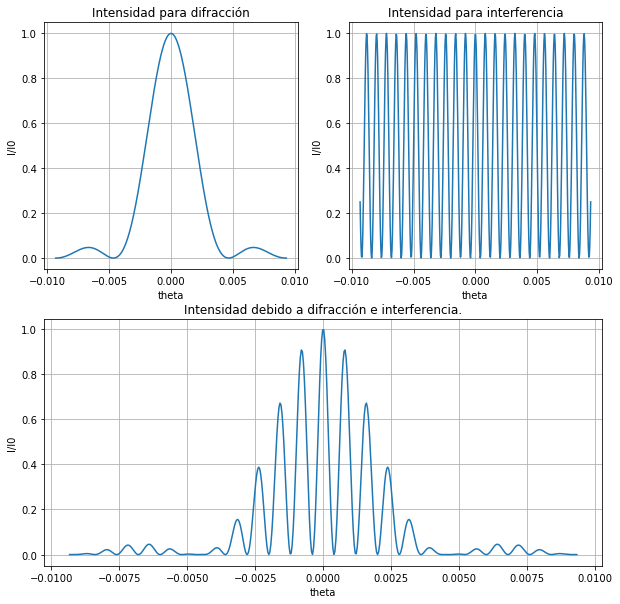

In [6]:
fig(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2]) #Graficas de las intensidades para cada fenomeno, y la del experimento de Young.

In [7]:
FT1= lambda theta: -((np.sin((np.pi*b*theta)/lamb)/((np.pi*b*theta)/lamb))**2)*((np.cos((np.pi*a*theta/lamb)))**2) 
#Función para encontrar el maximo con Fmin_powell. Corresponde a la intensidad I/Io del maximo principal.

optimize.fmin_powell( FT1, 1,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -0.000002
         Iterations: 4
         Function evaluations: 104


array([0.99199028])

In [21]:
def fig2(x,y,z): #Gráfica de la relación del fenomeno del experimento de Young.
    plt.figure(figsize=(9,8))

    plt.plot(theta, z, label="Interferencia")
    plt.plot(theta, y, label="Difracción")
    plt.plot(theta, x, label="Intensidad final")
    plt.xlabel("theta")
    plt.ylabel("I/I0")
    plt.grid()

    plt.legend()
    plt.show()

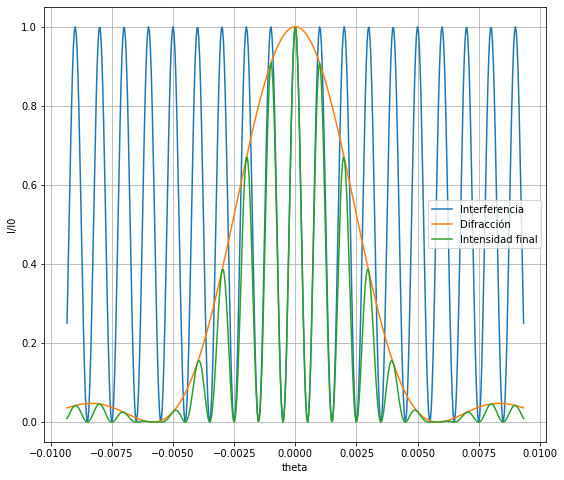

In [22]:
fig2(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

# Interferencia.
El siguiente codigo muestra las franjas en pantalla producidas por la interferencia al pasar una luz monocromátrica por la rendija doble. Se usa para distintas longitudes de onda.

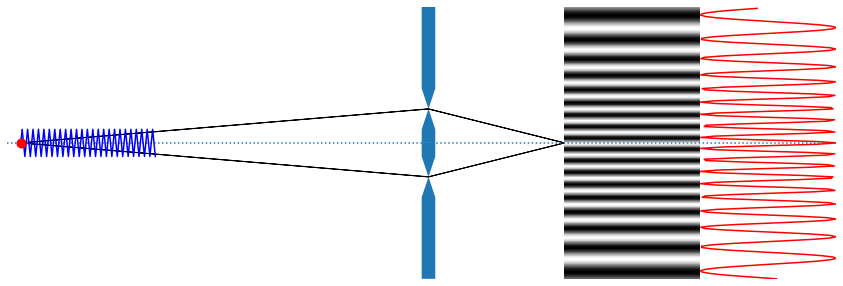

In [9]:
def double_slit (p0=[0],a0=[1],baseline=a*10e2,d1=3,d2=D,wavelength=lamb*10e4,maxint=None):
    """Renders a toy dual-slit experiment.
    'p0' is a list or array of source positions (drawn along the vertical axis)
    'a0' is an array of source intensities 
    'baseline' is the distance between the slits 
    'd1' and 'd2' are distances between source and plate and plate and screen
    'wavelength' is wavelength
    'maxint' is the maximum intensity scale use to render the fringe pattern. If None, the pattern
       is auto-scaled. Maxint is useful if you want to render fringes from multiple invocations
       of double_slit() into the same intensity scale, i.e. for comparison.
    """
    ## setup figure and axes
    plt.figure(figsize=(20, 5))
    plt.axes(frameon=False)
    plt.xlim(-d1-.1, d2+2) and plt.ylim(-1, 1)
    plt.xticks([]) and plt.yticks([])
    plt.axhline(0, ls=':')
    baseline /= 2.
    ## draw representation of slits
    plt.arrow(0, 1,0, baseline-1, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0,-1,0, 1-baseline, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0,  baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0, -baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    ## draw representation of lightpath from slits to centre of screen
    plt.arrow(0, baseline,d2,-baseline, length_includes_head=True)
    plt.arrow(0,-baseline,d2, baseline, length_includes_head=True)
    ## draw representation of sinewave from the central position
    xw = np.arange(-d1, -d1+(d1+d2)/4, .01)
    yw = np.sin(2*np.pi*xw/wavelength)*.1 + (p0[0]+p0[-1])/2
    plt.plot(xw,yw,'b')
    ## 'xs' is a vector of x cordinates on the screen
    ## and we accumulate the interference pattern for each source into 'pattern'
    xs = np.arange(-1, 1, .01) 
    pattern = 0
    total_intensity = 0
    ## compute contribution to pattern from each source position p
    for p,a in np.broadcast(p0,a0):
        plt.plot(-d1, p, marker='o', ms=10, mfc='red', mew=0)
        total_intensity += a
        if p == p0[0] or p == p0[-1]:
            plt.arrow(-d1, p, d1, baseline-p, length_includes_head=True)
            plt.arrow(-d1, p, d1,-baseline-p, length_includes_head=True)
        # compute the two pathlenghts
        path1 = np.sqrt(d1**2 + (p-baseline)**2) + np.sqrt(d2**2 + (xs-baseline)**2)
        path2 = np.sqrt(d1**2 + (p+baseline)**2) + np.sqrt(d2**2 + (xs+baseline)**2)
        diff = path1 - path2
        # caccumulate interference pattern from this source
        pattern = pattern + a*np.cos(2*np.pi*diff/wavelength) 
    maxint = maxint or total_intensity
    # add fake axis to interference pattern just to make it a "wide" image
    pattern_image = pattern[:,np.newaxis] + np.zeros(10)[np.newaxis,:]
    plt.imshow(pattern_image, extent=(d2,d2+1,-1,1), cmap=plt.gray(), vmin=-maxint, vmax=maxint)
    # make a plot of the interference pattern
    plt.plot(d2+1.5+pattern/(maxint*2), xs, 'r')
    plt.show()
# show patern for one source at 0
double_slit(p0=[0])

# Color verde.

In [23]:
lamb=df['Longitud (m)'][1]

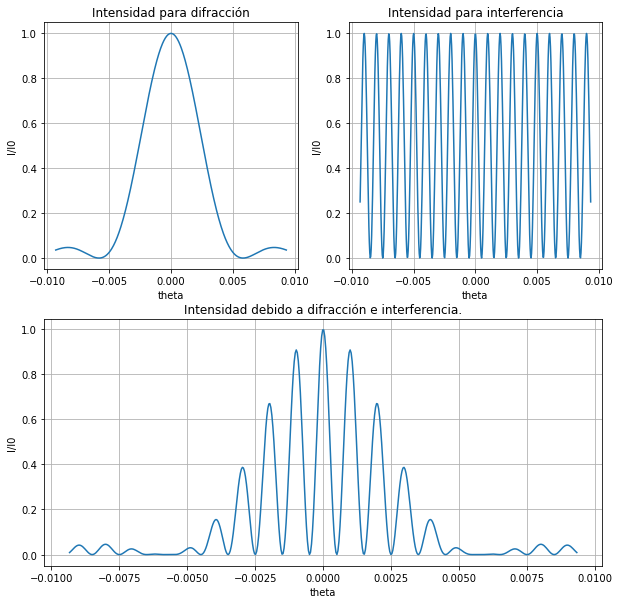

In [25]:
fig(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

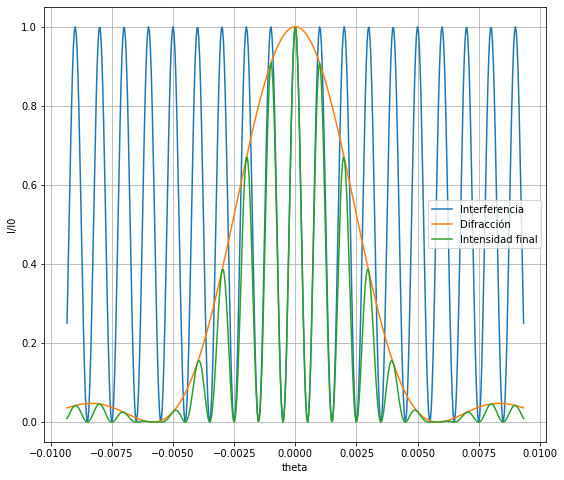

In [26]:
fig2(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

In [12]:
FT2= lambda theta: -((np.sin((np.pi*b*theta)/lamb)/((np.pi*b*theta)/lamb))**2)*((np.cos((np.pi*a*theta/lamb)))**2) 
#Función para encontrar el maximo con Fmin_powell. Corresponde a la intensidad I/Io del maximo principal.

optimize.fmin_powell( FT2, 1,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 39


array([-1.27146211e-15])

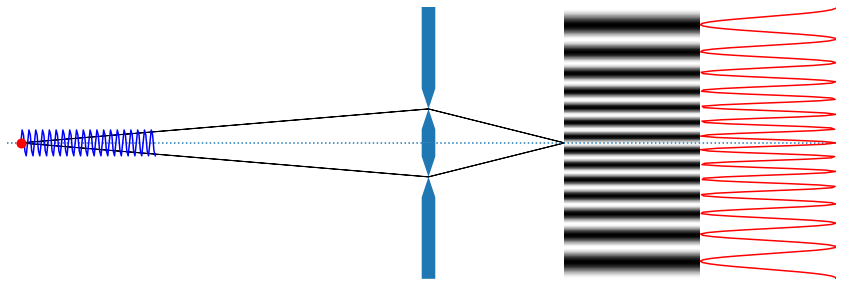

In [13]:
double_slit (p0=[0],a0=[1],baseline=a*10e2,d1=3,d2=D,wavelength=lamb*10e4,maxint=None)

# Color naranja.

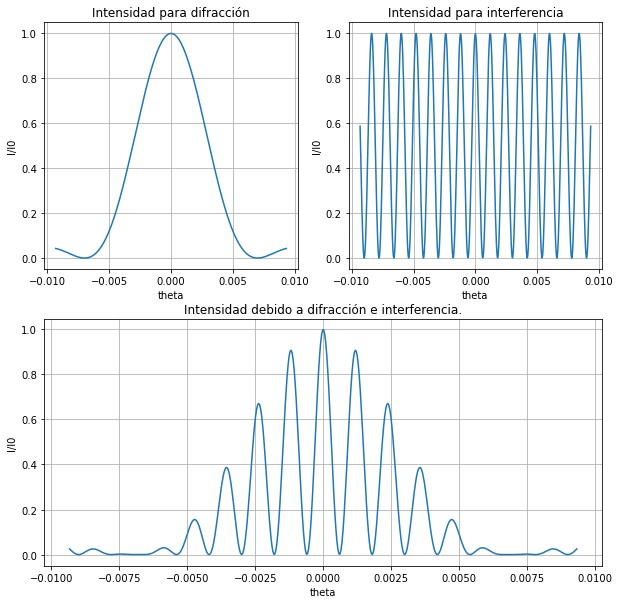

In [27]:
lamb=df['Longitud (m)'][2]
fig(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

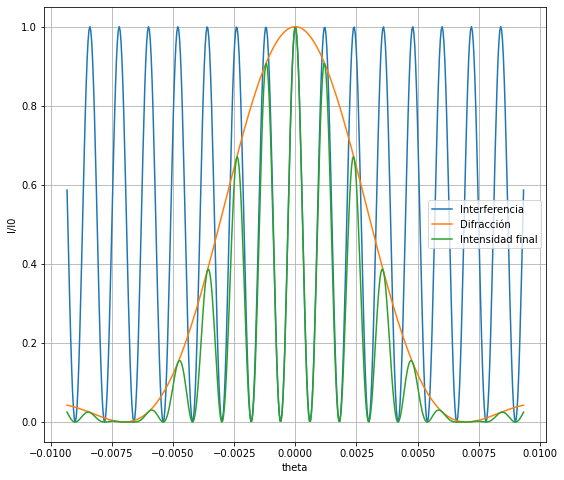

In [28]:
fig2(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

In [30]:
FT3= lambda theta: -((np.sin((np.pi*b*theta)/lamb)/((np.pi*b*theta)/lamb))**2)*((np.cos((np.pi*a*theta/lamb)))**2) 
#Función para encontrar el maximo con Fmin_powell. Corresponde a la intensidad I/Io del maximo principal.

optimize.fmin_powell( FT3, 1,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 38


array([-1.00627807e-13])

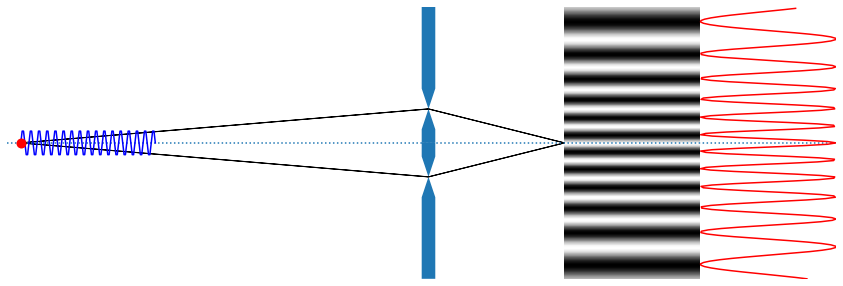

In [29]:
double_slit (p0=[0],a0=[1],baseline=a*10e2,d1=3,d2=D,wavelength=lamb*10e4,maxint=None)

# Color rojo.

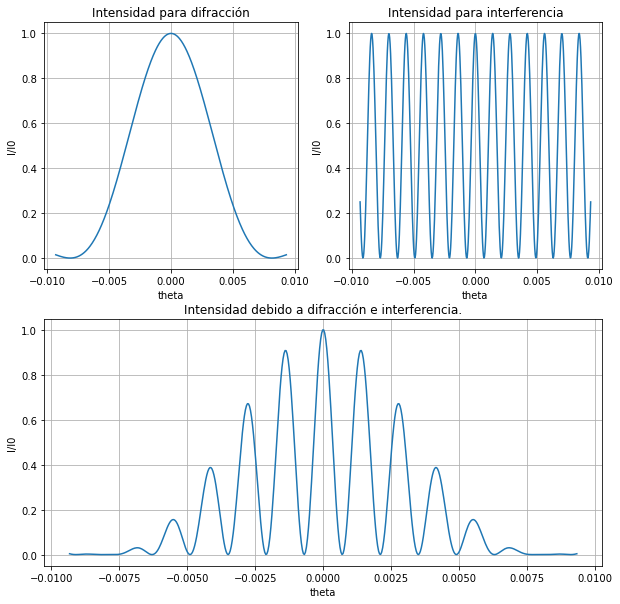

In [34]:
lamb=df['Longitud (m)'][3]
fig(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

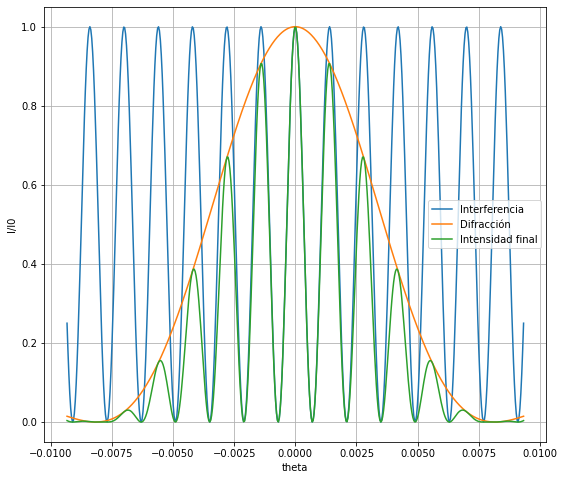

In [35]:
fig2(f(theta, lamb)[1],f(theta, lamb)[0],f(theta, lamb)[2])

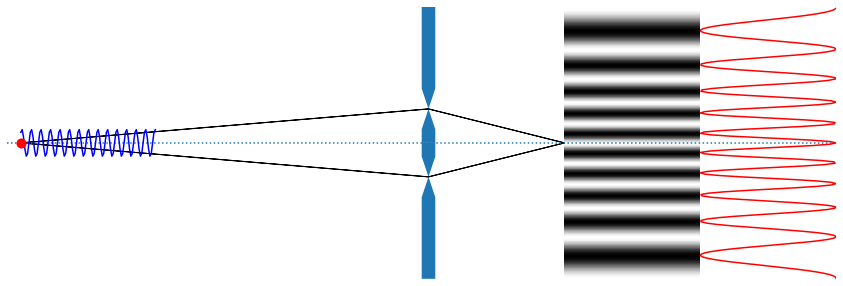

In [36]:
double_slit (p0=[0],a0=[1],baseline=a*10e2,d1=3,d2=D,wavelength=lamb*10e4,maxint=None)

--Respecto a la interferencia, al aumentar la longitud de onda y con las mismas condiciones se aprecian menos franjas brillantes o maximos de intensidad. El ancho angular para estos maximos es cada vez mayor.

--En las graficas se observa que entre mayor es la longitud de onda, mayor es la distancia entre cada maximo de intensidad. Esto se relaciona con las franjas de interferencia y la ecuación (2), esta tiene dependencia de alfa y beta, y estás dependen de la distancia angular, y la longitud de onda.

# Bibliografía.

[1] https://co.pinterest.com/pin/418905202833693750/

[2] Alzate, H.(2006). Física de las Ondas. Universidad de Antioquia.

[3]http://math_research.uct.ac.za/~siphelo/admin/interferometry/1_Radio_Science/01_09_a_brief_introduction_to_interferometry.html